In [1]:
#Importing the neccesary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [79]:
#Loading the data
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [80]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
#Categorical Variables- Discipline,Rank and Sex
#Continuous Variables-Yrs.Since.PhD and Yrs.Service
#Target is Salary
data["discipline"].unique()

array(['B', 'A'], dtype=object)

In [5]:
data["rank"].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [6]:
data["sex"].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
#Statistical Summary of the data
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
#Check for null values
data.isnull().sum().sum()

0

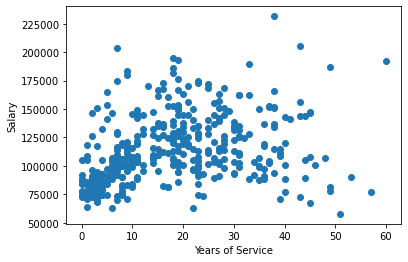

In [9]:
#Checking the variation of features w.r.t target
plt.scatter(x=data["yrs.service"],y=data["salary"])
plt.xlabel("Years of Service")
plt.ylabel("Salary")
plt.show()

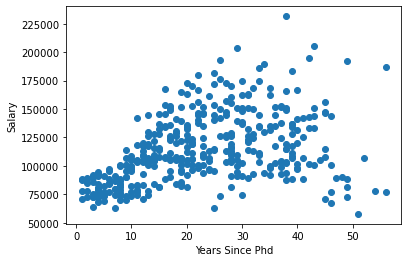

In [10]:
plt.scatter(x=data["yrs.since.phd"],y=data["salary"])
plt.xlabel("Years Since Phd")
plt.ylabel("Salary")
plt.show()

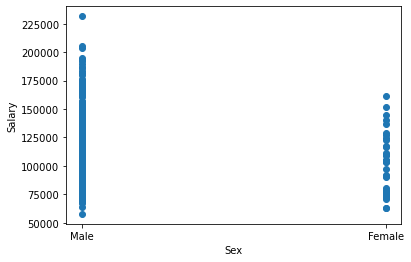

In [11]:
plt.scatter(x=data["sex"],y=data["salary"])
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()

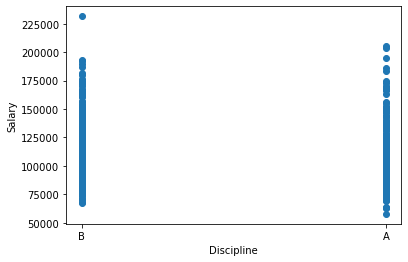

In [12]:
plt.scatter(x=data["discipline"],y=data["salary"])
plt.xlabel("Discipline")
plt.ylabel("Salary")
plt.show()

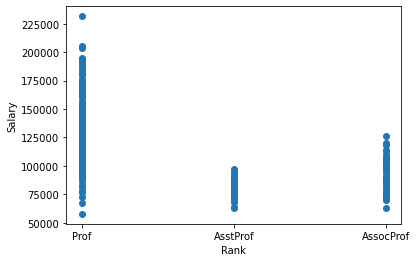

In [13]:
plt.scatter(x=data["rank"],y=data["salary"])
plt.xlabel("Rank")
plt.ylabel("Salary")
plt.show()

In [14]:
#Checking the correlation of the data
data.corr()["salary"].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

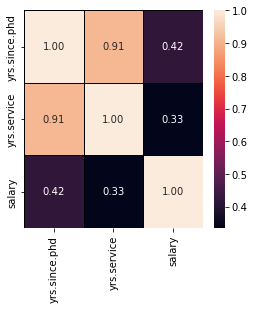

In [15]:
#Visualising the correlation using heatmap
plt.figure(figsize=(4,4)) 
sns.heatmap(data.corr(), annot=True, linewidth=0.5, linecolor="black", fmt=".2f")

<AxesSubplot:>

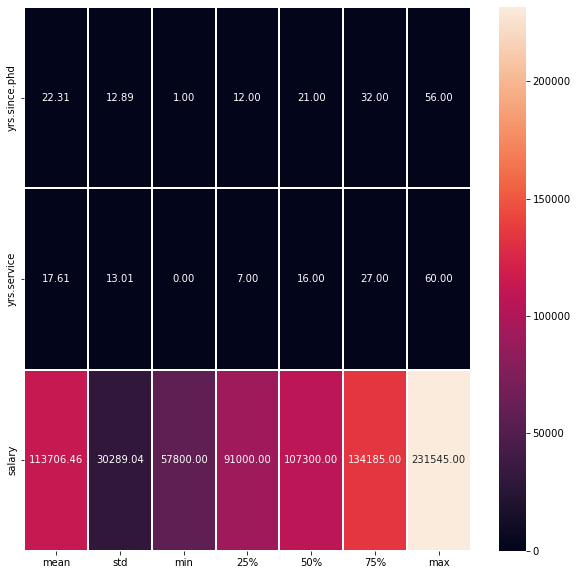

In [17]:
plt.figure(figsize=(10,10)) 
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt=".2f")

<AxesSubplot:>

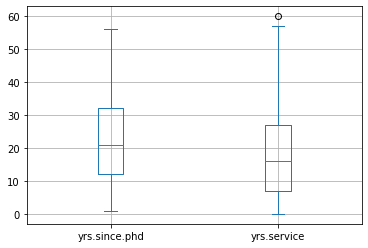

In [18]:
#CHeck the outliers-box plot of features
import warnings
warnings.filterwarnings("ignore")

data1=data[["yrs.since.phd","yrs.service"]]

data1.plot.box(grid="True")
#Feature-"yrs.service has outliers"

In [19]:
data.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

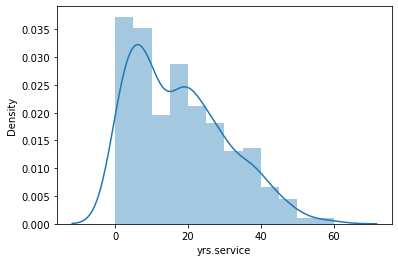

In [20]:
#Checking normal distributions of the features
sns.distplot(data["yrs.service"])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

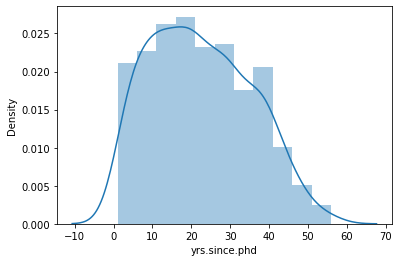

In [21]:
sns.distplot(data["yrs.since.phd"])

In [22]:
#DATA CLEANING
data.corr()["salary"].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

In [24]:
#Removing Outliers using IQR proximity rule (Z-score)
from scipy import stats
z1=abs(stats.zscore(data["yrs.service"]))

In [25]:
z1

0      0.029669
1      0.124300
2      1.125098
3      1.646343
4      1.800312
         ...   
392    0.953483
393    0.106654
394    0.568560
395    0.201284
396    1.048113
Name: yrs.service, Length: 397, dtype: float64

In [26]:
#Location of Outliers
np.where(z1>3)

(array([131, 330], dtype=int64),)

In [81]:
#Removing Outliers
data_new=data[(np.abs(stats.zscore(data["yrs.service"])) < 3)]

In [28]:
data_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [82]:
#Encoding the categorical features
col=["rank","discipline","sex"]
df_encode=(pd.get_dummies(data_new[["rank","discipline","sex"]],drop_first="True"))
df= data_new.drop(col,axis = 1)
df = df_encode.join(df)

In [83]:
df

,rank_AsstProf,rank_Prof,discipline_B,sex_Male,yrs.since.phd,yrs.service,salary
0,0,1,1,1,19,18,139750
1,0,1,1,1,20,16,173200
2,1,0,1,1,4,3,79750
3,0,1,1,1,45,39,115000
4,0,1,1,1,40,41,141500
...,...,...,...,...,...,...,...
392,0,1,0,1,33,30,103106
393,0,1,0,1,31,19,150564
394,0,1,0,1,42,25,101738
395,0,1,0,1,25,15,95329


In [84]:
#Splitting features and target
X=df.iloc[:,:-1]  #independent
Y=df.iloc[:,-1]  #dependent


In [85]:
a=np.mean(X["yrs.service"])
b=np.mean(X["yrs.since.phd"])
print(a,b)

17.40759493670886 22.162025316455697


In [86]:
#Power tranform for normal distribution of features
from sklearn.preprocessing import power_transform

X=power_transform(X,method="yeo-johnson")


In [87]:
#scaling the data before feeding it to the model
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)


In [88]:
X.mean()

1.199228246008608e-17

In [89]:
X.std()

1.0

In [90]:
# Importing neccesary modules for Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [91]:
lr=LinearRegression()

In [92]:
#Splitting data into train and test

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=2000)

In [93]:
#Training the model
lr.fit(x_train,y_train)

LinearRegression()

In [98]:
#Testing the model
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

#R2_score of 45%

0.45054053996846066


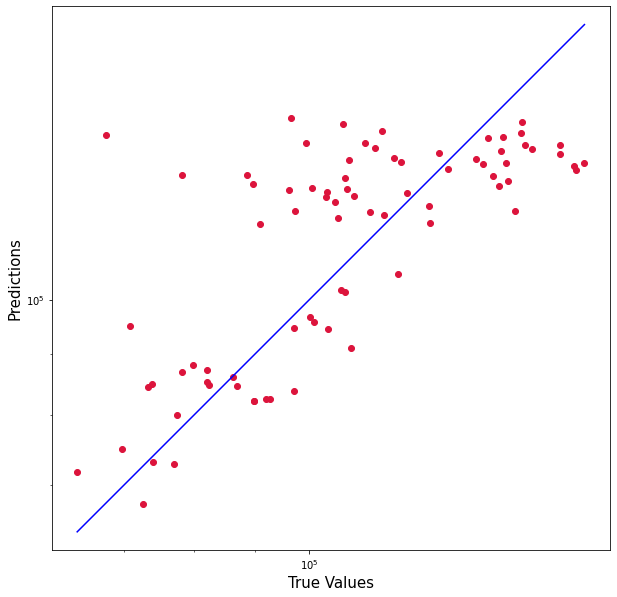

In [109]:
#Plotting the Predicted and Test Data
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_test,), max(y_test))
p2 = min(min(pred_test,), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()